# Export Discord Data
Use discord chat export to export the target discussion into cvs format. Following link is the tools and details steps to export data
https://github.com/Tyrrrz/DiscordChatExporter

In this chapter, we mainly export only announcement and general discussion from the target group. 

# Explore discord data

In [2]:
import json
import pandas as pd
import numpy as np
import datetime as dt
import warnings
import matplotlib.pyplot as plt
import pandas_datareader as web
warnings.filterwarnings("ignore")

In [3]:
#identify specific date to extract
start = dt.datetime(2021,10,1)
end = dt.datetime(2022,6,30)

#2021-10-01 to 2022-06-30

In [4]:
#extract data from yahoo finance
MANA = web.DataReader('MANA-USD','yahoo', start, end)
ENJ = web.DataReader('ENJ-USD','yahoo', start, end)
RACA = web.DataReader('RACA-USD','yahoo', start, end)
BTC = web.DataReader('BTC-USD','yahoo', start, end)
ETH = web.DataReader('ETH-USD','yahoo', start, end)
BNB = web.DataReader('BNB-USD','yahoo', start, end)

In [5]:
MANA = MANA.reset_index()
ENJ = ENJ.reset_index()
RACA = RACA.reset_index()
BTC = BTC.reset_index()
ETH = ETH.reset_index()
BNB = BNB.reset_index()

In [6]:
def match_date(start, end, data):
    data.Date = pd.to_datetime(data.Date)
    data = data[(data['Date'] >= start) & (data['Date'] <= end)]
    data["Date"] = data["Date"].apply(lambda x: pd.to_datetime(x, unit="ns", utc=True).floor('D').date())
    #data.columns = data.columns.str.replace('Date', 'date')
    return data

In [7]:
MANA = match_date(start, end, MANA)
ENJ = match_date(start, end, ENJ)
RACA = match_date(start, end, RACA)
BTC = match_date(start, end, BTC)
ETH = match_date(start, end, ETH)
BNB = match_date(start, end, BNB)

#add pct change column
ClosingPrice = MANA[['Adj Close']]
MANA['pct_change'] = ClosingPrice.pct_change()*100
#add pct change column
ClosingPrice = ENJ[['Adj Close']]
ENJ['pct_change'] = ClosingPrice.pct_change()*100
#add pct change column
ClosingPrice = RACA[['Adj Close']]
RACA['pct_change'] = ClosingPrice.pct_change()*100
#add pct change column
ClosingPrice = BTC[['Adj Close']]
BTC['pct_change'] = ClosingPrice.pct_change()*100
#add pct change column
ClosingPrice = ETH[['Adj Close']]
ETH['pct_change'] = ClosingPrice.pct_change()*100
#add pct change column
ClosingPrice = BNB[['Adj Close']]
BNB['pct_change'] = ClosingPrice.pct_change()*100

MANA = MANA.set_index('Date')
ENJ = ENJ.set_index('Date')
RACA = RACA.set_index('Date')
BTC = BTC.set_index('Date')
ETH = ETH.set_index('Date')
BNB = BNB.set_index('Date')

In [8]:
import matplotlib.ticker as ticker

def plot_count_content_by_week(data, title):

    # create a Series, grouping by week
    weekly_series = data.groupby(pd.Grouper(key='Date', freq='W-MON'))['Content'].count()
    # and plot it
    ax =weekly_series.plot(kind='bar')

    # Set title and labels for axes
    ax.set(xlabel="Date",
       ylabel="Count transactions",
       title="{0} frequency transactions by week".format(title))
    
    # Make most of the ticklabels empty so the labels don't get too crowded
    ticklabels = ['']*len(weekly_series.index)
    # Every 4th ticklable shows the month and day
    ticklabels[::4] = [item.strftime('%b %d') for item in weekly_series.index[::4]]
    # Every 12th ticklabel includes the year
    ticklabels[::12] = [item.strftime('%b %d\n%Y') for item in weekly_series.index[::12]]
    ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))
    
    plt.gcf().autofmt_xdate()

    plt.show()
    

In [9]:
MANA_Discussion = pd.read_csv(r"Data/discord/Decentraland_General_2021-10-01_2022-06-30.csv", sep=",")

MANA_Discussion["Date"] = MANA_Discussion["Date"].apply(lambda x: pd.to_datetime(x, unit="ns", utc=True).floor('D').date())
MANA_Discussion["Date"] = MANA_Discussion["Date"].apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d'))

In [10]:
MANA_Discussion_By_Daily_Count=MANA_Discussion.groupby(pd.Grouper(key='Date', freq='D'))['Content'].count()

In [11]:
#join data
MANA_Discussion_Merge = MANA.join(MANA_Discussion_By_Daily_Count)
MANA_Discussion_Merge = MANA_Discussion_Merge.fillna(0)
MANA_Discussion_Filter = MANA_Discussion_Merge[MANA_Discussion_Merge["Content"]>0].reset_index()

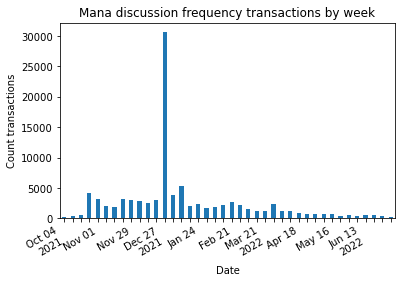

In [12]:
plot_count_content_by_week(MANA_Discussion, "Mana discussion")
#plot_count_content_by_week(MANA_Discussion, "Mana discussion")

In [13]:
MANA_Discussion[["Content"]].describe()

,Content
count,97287
unique,85873
top,hi
freq,313


In [14]:
ENJ_Discussion = pd.read_csv(r"Data/discord/Enjin_General_2021-10-01_2022-06-30.csv", sep=",")

ENJ_Discussion["Date"] = ENJ_Discussion["Date"].apply(lambda x: pd.to_datetime(x, unit="ns", utc=True).floor('D').date())
ENJ_Discussion["Date"] = ENJ_Discussion["Date"].apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d'))

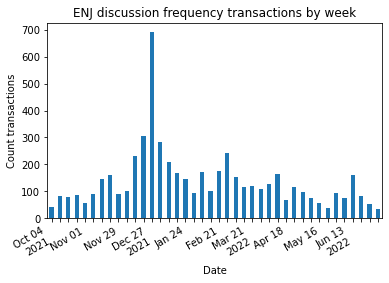

In [15]:
plot_count_content_by_week(ENJ_Discussion, "ENJ discussion")

In [16]:
ENJ_Discussion[["Content"]].describe()

,Content
count,5508
unique,4761
top,Hi
freq,212


In [17]:
RACA_Discussion = pd.read_csv(r"Data/discord/RadioCaca_General2021-10-01_2022-06-30.csv", sep=",")

RACA_Discussion["Date"] = RACA_Discussion["Date"].apply(lambda x: pd.to_datetime(x, unit="ns", utc=True).floor('D').date())
RACA_Discussion["Date"] = RACA_Discussion["Date"].apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d'))

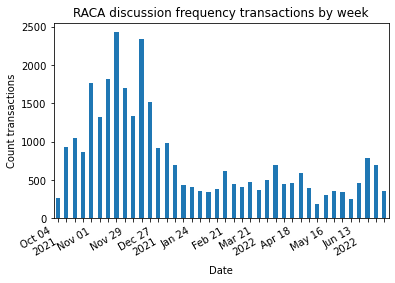

In [18]:
plot_count_content_by_week(RACA_Discussion, "RACA discussion")

In [19]:
RACA_Discussion[["Content"]].describe()

,Content
count,31052
unique,27924
top,hi
freq,309


In [26]:
BTC_Discussion = pd.read_csv(r"Data/discord/Bitcoin_General_2021-10-01_2022-06-30.csv", sep=",")

BTC_Discussion["Date"] = BTC_Discussion["Date"].apply(lambda x: pd.to_datetime(x, unit="ns", utc=True).floor('D').date())
BTC_Discussion["Date"] = BTC_Discussion["Date"].apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d'))

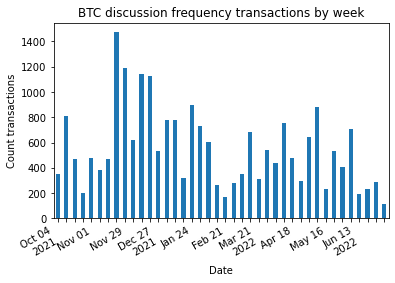

In [27]:
plot_count_content_by_week(BTC_Discussion, "BTC discussion")

In [28]:
BTC_Discussion[["Content"]].describe()

,Content
count,22151
unique,18050
top,🤣
freq,318


In [20]:
ETH_Discussion = pd.read_csv(r"Data/discord/Ethereum_General_2021-10-01_2022-06-30.csv", sep=",")

ETH_Discussion["Date"] = ETH_Discussion["Date"].apply(lambda x: pd.to_datetime(x, unit="ns", utc=True).floor('D').date())
ETH_Discussion["Date"] = ETH_Discussion["Date"].apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d'))

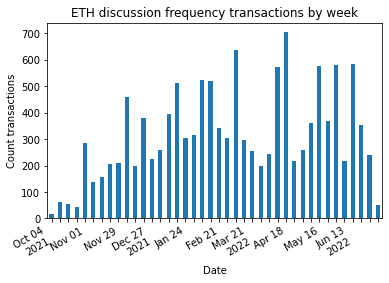

In [21]:
plot_count_content_by_week(ETH_Discussion, "ETH discussion")

In [22]:
ETH_Discussion[["Content"]].describe()

,Content
count,12623
unique,11978
top,Hi
freq,40


In [23]:
BNB_Discussion = pd.read_csv(r"Data/discord/Binance_General_2021-10-01_2022-06-30.csv", sep=",")

BNB_Discussion["Date"] = BNB_Discussion["Date"].apply(lambda x: pd.to_datetime(x, unit="ns", utc=True).floor('D').date())
BNB_Discussion["Date"] = BNB_Discussion["Date"].apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d'))

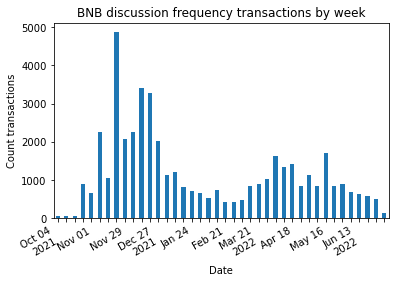

In [24]:
plot_count_content_by_week(BNB_Discussion, "BNB discussion")

In [25]:
BNB_Discussion[["Content"]].describe()

,Content
count,46104
unique,35833
top,Hi
freq,1050
